In [1]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder = 'simulation_num_uavs'
file = glob.glob(str(folder+'/'+'*.txt'))
df = pd.read_csv(file[0], delimiter = ",")

In [3]:
df.head()

,exec_time,NUM_UAVS,MODE,ALWAYS_COMMUNICATION,total_iter,total_cov_area,average_inst_cov_area,mission_time
0,12382.23,2,unique,False,284,95.04,6.01,56.8
1,12411.37,2,unique,False,293,95.00,6.04,58.6
2,12436.43,2,unique,False,267,95.16,5.95,53.4
3,12469.42,2,unique,False,292,95.00,6.05,58.4
4,12500.75,2,unique,False,364,95.08,5.99,72.8


In [4]:
average = df.groupby('NUM_UAVS').mean()
average

,exec_time,ALWAYS_COMMUNICATION,total_iter,total_cov_area,average_inst_cov_area,mission_time
NUM_UAVS,,,,,,
2,7657.624000,False,320.200000,95.056000,5.974000,64.040000
3,7822.316000,False,248.900000,95.132000,8.834000,49.780000
4,52551.371481,False,279.555556,95.114074,11.366049,55.911111
5,8330.032000,False,133.600000,95.084000,14.257000,26.720000
6,8554.180000,False,105.700000,95.160000,16.603000,21.140000
7,8811.362000,False,97.100000,95.204000,19.153000,19.420000
8,9104.934000,False,85.200000,95.136000,20.986000,17.040000
9,43093.467000,False,80.700000,95.200000,22.977000,16.140000
10,43923.005000,False,73.400000,95.152000,24.695000,14.680000


/home/miquel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


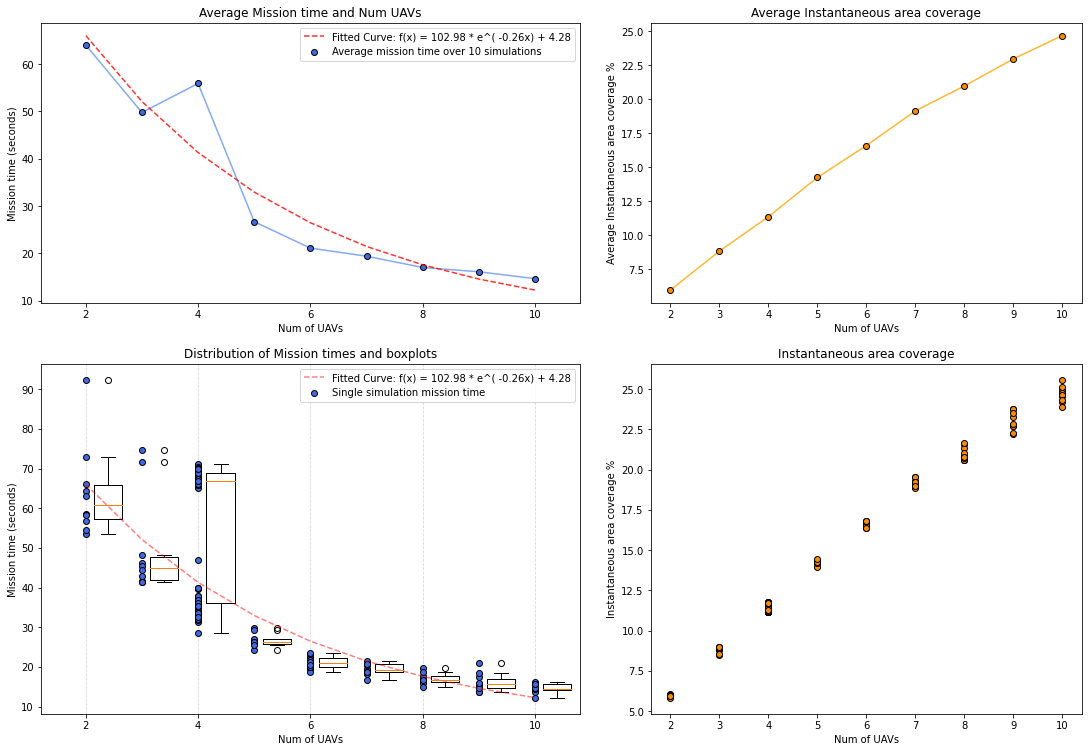

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 11),
                        gridspec_kw={'height_ratios': [4, 5], 'width_ratios': [5,4]})
fig.tight_layout(pad=4.0)

# Mission time plot - averages
axs[0][0].set_title("Average Mission time and Num UAVs")
axs[0][0].set_xlabel("Num of UAVs")
axs[0][0].set_ylabel("Mission time (seconds)")
axs[0][0].scatter(average.index, average['mission_time'],
                  color='royalblue', alpha=1, edgecolor='black', zorder=2,
                  label='Average mission time over 10 simulations')
axs[0][0].plot(average.index, average['mission_time'], color='cornflowerblue', alpha=0.8, zorder=1)

X = list(map(lambda i:[i], average.index))
y = list(map(lambda i:[i], average['mission_time']))
min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

# poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
# reg = LinearRegression().fit(poly_X, y)
# line = np.linspace(min_x - 0.05 * diff_x, max_x + 0.05 * diff_x).reshape(-1, 1)
# xs = PolynomialFeatures(degree=2, include_bias=False).fit_transform(line)
# ys = reg.predict(xs)
# axs[0][0].plot(xs[:,0], ys, color='red', linestyle='--', alpha=0.8,
#                label="Tendency line (Polynomial Regression 2º degree)")

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.array(average.index, dtype=np.float64)
y = np.array(average['mission_time'], dtype=np.float64)
popt, pcov = curve_fit(func, x, y)
axs[0][0].plot(x, func(x, *popt), color='red', linestyle='--', alpha=0.8,
               label=str("Fitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))

axs[0][0].set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
axs[0][0].legend()


# Avg instantaneous coverage plot - averages
axs[0][1].set_title("Average Instantaneous area coverage")
axs[0][1].set_xlabel("Num of UAVs")
axs[0][1].set_ylabel("Average Instantaneous area coverage %")
axs[0][1].scatter(average.index, average['average_inst_cov_area'], color='darkorange', alpha=1, edgecolor='black', zorder=2)
axs[0][1].plot(average.index, average['average_inst_cov_area'], color='orange', alpha=0.8, zorder=1)

# Mission time plot - samples distribution - boxplots
axs[1][0].set_title("Distribution of Mission times and boxplots")
axs[1][0].set_xlabel("Num of UAVs")
axs[1][0].set_ylabel("Mission time (seconds)")
data = list(df.groupby('NUM_UAVS')['mission_time'].apply(list))
data.insert(0,[])
axs[1][0].boxplot(data, positions=list(np.arange(1.4,11.4,1.0)), manage_ticks=False)
axs[1][0].scatter(df['NUM_UAVS'], df['mission_time'], color='royalblue', alpha=1,
                  edgecolor='black', zorder=2, label="Single simulation mission time")
axs[1][0].grid(axis='x', linestyle='--', alpha=0.5)
# axs[1][0].plot(xs[:,0], ys, color='red', linestyle='--', alpha=0.25,
#                label="Tendency line (Polynomial Regression 2º degree)")
axs[1][0].plot(x, func(x, *popt), color='red', linestyle='--', alpha=0.5,
               label=str("Fitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))
axs[1][0].set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
axs[1][0].legend()

# Instantaneous area coverage samples distribution
axs[1][1].set_title("Instantaneous area coverage")
axs[1][1].set_xlabel("Num of UAVs")
axs[1][1].set_ylabel("Instantaneous area coverage %")
axs[1][1].scatter(df['NUM_UAVS'], df['average_inst_cov_area'], color='darkorange', alpha=1, edgecolor='black', zorder=2)

plt.savefig('fig.png', dpi=300)
plt.show()

/home/miquel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


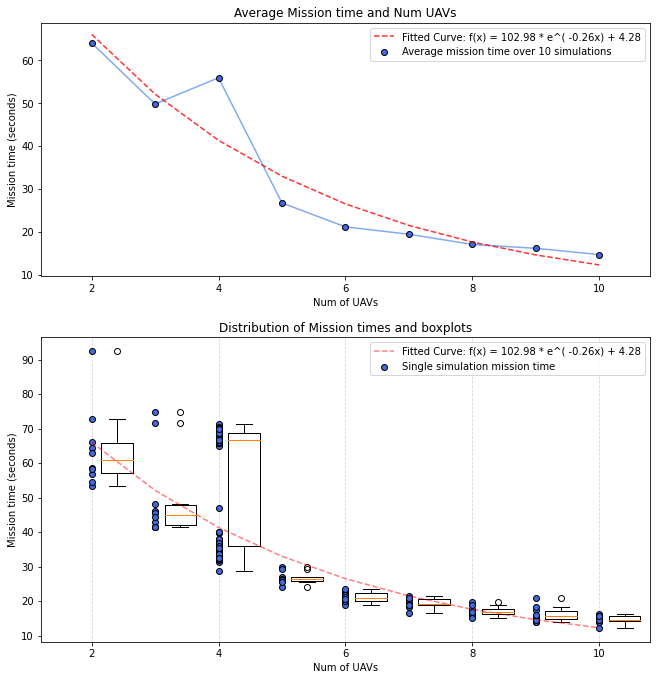

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 10),
                        gridspec_kw={'height_ratios': [5,6]})
fig.tight_layout(pad=4.0)

# Mission time plot - averages
axs[0].set_title("Average Mission time and Num UAVs")
axs[0].set_xlabel("Num of UAVs")
axs[0].set_ylabel("Mission time (seconds)")
axs[0].scatter(average.index, average['mission_time'],
                  color='royalblue', alpha=1, edgecolor='black', zorder=2,
                  label='Average mission time over 10 simulations')
axs[0].plot(average.index, average['mission_time'], color='cornflowerblue', alpha=0.8, zorder=1)

X = list(map(lambda i:[i], average.index))
y = list(map(lambda i:[i], average['mission_time']))
min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

# poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
# reg = LinearRegression().fit(poly_X, y)
# line = np.linspace(min_x - 0.05 * diff_x, max_x + 0.05 * diff_x).reshape(-1, 1)
# xs = PolynomialFeatures(degree=2, include_bias=False).fit_transform(line)
# ys = reg.predict(xs)
# axs[0][0].plot(xs[:,0], ys, color='red', linestyle='--', alpha=0.8,
#                label="Tendency line (Polynomial Regression 2º degree)")

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.array(average.index, dtype=np.float64)
y = np.array(average['mission_time'], dtype=np.float64)
popt, pcov = curve_fit(func, x, y)
axs[0].plot(x, func(x, *popt), color='red', linestyle='--', alpha=0.8,
               label=str("Fitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))

axs[0].set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
axs[0].legend()

# Mission time plot - samples distribution - boxplots
axs[1].set_title("Distribution of Mission times and boxplots")
axs[1].set_xlabel("Num of UAVs")
axs[1].set_ylabel("Mission time (seconds)")
data = list(df.groupby('NUM_UAVS')['mission_time'].apply(list))
data.insert(0,[])
axs[1].boxplot(data, positions=list(np.arange(1.4,11.4,1.0)), manage_ticks=False)
axs[1].scatter(df['NUM_UAVS'], df['mission_time'], color='royalblue', alpha=1,
                  edgecolor='black', zorder=2, label="Single simulation mission time")
axs[1].grid(axis='x', linestyle='--', alpha=0.5)
# axs[1][0].plot(xs[:,0], ys, color='red', linestyle='--', alpha=0.25,
#                label="Tendency line (Polynomial Regression 2º degree)")
axs[1].plot(x, func(x, *popt), color='red', linestyle='--', alpha=0.5,
               label=str("Fitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))
axs[1].set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
axs[1].legend()


plt.savefig('num-uavs-mission-time.png', dpi=300)
plt.show()

/home/miquel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp
/home/miquel/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp


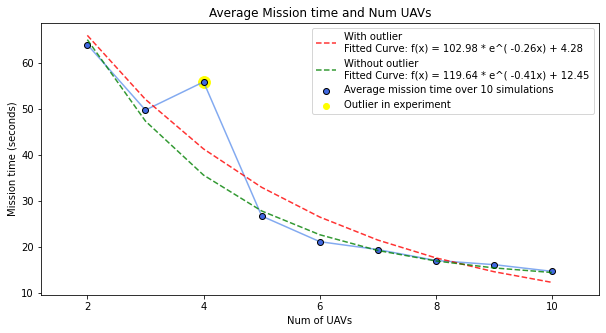

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

plt.figure(figsize=(10, 5))

x = np.array(average.index, dtype=np.float64)
y = np.array(average['mission_time'], dtype=np.float64)

min_x = np.min(x)
max_x = np.max(x)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y


# Mission time plot - averages
plt.title("Average Mission time and Num UAVs")
plt.xlabel("Num of UAVs")
plt.ylabel("Mission time (seconds)")
plt.scatter(average.index, average['mission_time'],
                  color='royalblue', alpha=1, edgecolor='black', zorder=2,
                  label='Average mission time over 10 simulations')
plt.scatter(4, average['mission_time'][4],
                  color='yellow', alpha=1, zorder=0, s=140)
plt.scatter(0,40,label="Outlier in experiment",color='yellow')
plt.plot(average.index, average['mission_time'], color='cornflowerblue', alpha=0.8, zorder=1)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fitted line with outlier
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), color='red', linestyle='--', alpha=0.8,
               label=str("With outlier \nFitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))
# Fitted line without outlier
new_x = np.delete(x,2)
new_y = np.delete(y,2)
popt2, pcov2 = curve_fit(func, new_x, new_y)
plt.plot(x, func(x, *popt2), color='green', linestyle='--', alpha=0.8,
               label=str("Without outlier \nFitted Curve: f(x) = "+str(popt2[0].round(2))+' * e^('+' -'+str(popt2[1].round(2))+
                         'x) + '+str(popt2[2].round(2))))

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.legend()


plt.savefig('num-uav-mission-avg.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

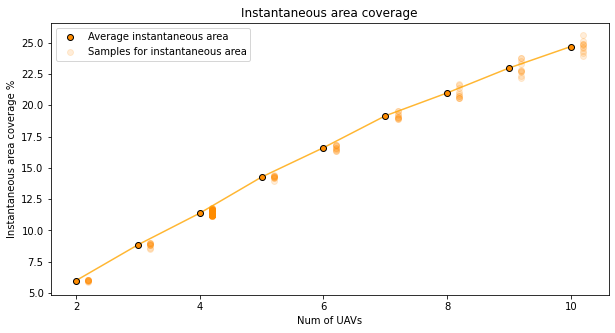

In [8]:
plt.figure(figsize=(10, 5))

# Avg instantaneous coverage plot - averages
plt.title("Average Instantaneous area coverage")
plt.xlabel("Num of UAVs")
plt.ylabel("Average Instantaneous area coverage %")
plt.scatter(average.index, average['average_inst_cov_area'], color='darkorange',
            alpha=1, edgecolor='black', zorder=3, label="Average instantaneous area")
plt.plot(average.index, average['average_inst_cov_area'], color='orange', alpha=0.8, zorder=2)

# Instantaneous area coverage samples distribution
plt.title("Instantaneous area coverage")
plt.xlabel("Num of UAVs")
plt.ylabel("Instantaneous area coverage %")
plt.scatter(df['NUM_UAVS']+0.2, df['average_inst_cov_area'], color='darkorange',
            alpha=0.15, zorder=1, label="Samples for instantaneous area")

plt.legend()
plt.savefig('num-uav-inst.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


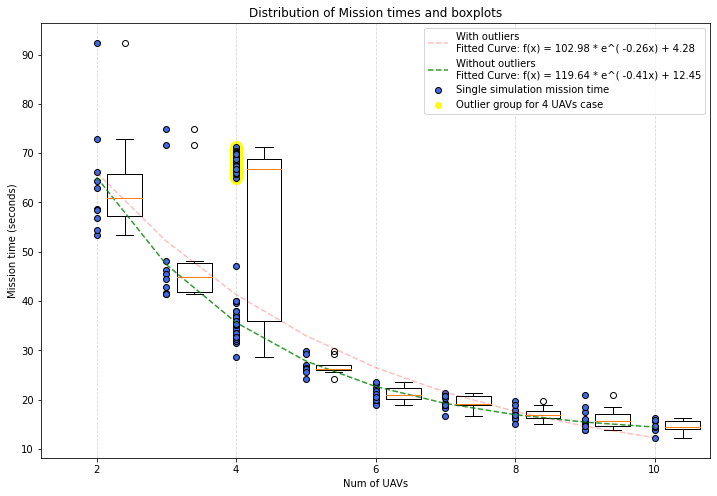

In [11]:
plt.figure(figsize=(12, 8))

# Mission time plot - samples distribution - boxplots
plt.title("Distribution of Mission times and boxplots")
plt.xlabel("Num of UAVs")
plt.ylabel("Mission time (seconds)")

data = list(df.groupby('NUM_UAVS')['mission_time'].apply(list))
data.insert(0,[])

plt.boxplot(data, positions=list(np.arange(1.4,11.4,1.0)), manage_ticks=False)
plt.scatter(df['NUM_UAVS'], df['mission_time'], color='royalblue', alpha=1,
                  edgecolor='black', zorder=2, label="Single simulation mission time")

# Plotting outliers
selection = df[df['NUM_UAVS']==4]['mission_time'] > 50
outliers = df[df['NUM_UAVS']==4]['mission_time'][selection]
num_outliers = len(outliers)*[4]

plt.scatter(num_outliers, outliers,
                  color='yellow', alpha=1, zorder=0, s=140)
plt.scatter(0,40,label="Outlier group for 4 UAVs case",color='yellow')

# Grid lines
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.plot(x, func(x, *popt), color='red', linestyle='--', alpha=0.25,
               label=str("With outliers \nFitted Curve: f(x) = "+str(popt[0].round(2))+' * e^('+' -'+str(popt[1].round(2))+
                         'x) + '+str(popt[2].round(2))))

plt.plot(x, func(x, *popt2), color='green', linestyle='--', alpha=0.8,
               label=str("Without outliers \nFitted Curve: f(x) = "+str(popt2[0].round(2))+' * e^('+' -'+str(popt2[1].round(2))+
                         'x) + '+str(popt2[2].round(2))))

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.legend()

plt.savefig('num-uav-mission-boxplot.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()